In [5]:
import pandas as pd
import numpy as np

# To Load data from Excel file
file_path = r"C:\Users\YSPRE\Downloads\Lab Session1 Data.xlsx"
# To Load the Excel file into a DataFrame
purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')

# Extracting features (matrix X) and target (vector y)
# Matrix X contains the features (columns 1, 2, and 3)
X = purchase_data.iloc[:, 1:4]
# Vector y contains the target variable (column 4)
y = purchase_data.iloc[:, 4]

# To display the feature matrix X and target vector y
print("Feature Matrix X:")
print(X)
print("\nTarget Vector y:")
print(y)

# To calculate the dimensionality of the feature space
dimensionality = X.shape[1]
print(f"\nDimensionality of the feature space: {dimensionality}")

# To calculate the number of samples in the dataset
num_samples = X.shape[0]
print(f"Number of samples in the dataset: {num_samples}")

# To calculate the rank of the feature matrix X
rank_X = np.linalg.matrix_rank(X)
print(f"\nRank of Feature Matrix X: {rank_X}")

# To calculate the pseudo-inverse of the feature matrix X
X_pseudo_inverse = np.linalg.pinv(X)
print("\nPseudo-inverse of Feature Matrix X:")
print(X_pseudo_inverse)

Feature Matrix X:
   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4

Target Vector y:
0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64

Dimensionality of the feature space: 3
Number of samples in the dataset: 10

Rank of Feature Matrix X: 3

Pseudo-inverse of Feature Matrix X:
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.018

In [9]:
# Calculate the cost of each product using pseudo-inverse
product_costs = np.dot(X_pseudo_inverse, y)
# Display the product costs
print("Cost of each product using Pseudo-Inverse:")
for i, cost in enumerate(product_costs):
    print(f"Product {i+1}: {cost}")


Cost of each product using Pseudo-Inverse:
Product 1: 0.9999999999999989
Product 2: 54.99999999999999
Product 3: 18.0


In [13]:
import pandas as pd
import numpy as np

# To calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

# To predict the class of a query point based on k-nearest neighbors
def predict_class_knn(training_data, labels, query_point, k):
    # To calculate distances between the query point and all training data points
    distances = [euclidean_distance(query_point, data_point) for data_point in training_data]
    # To find the indices of the k nearest neighbors
    nearest_indices = np.argsort(distances)[:k]
    # To get the labels of the k nearest neighbors
    nearest_labels = [labels[i] for i in nearest_indices]
    # Predict the class 
    predicted_class = max(set(nearest_labels), key=nearest_labels.count)
    return predicted_class

# To load data from an Excel file
def load_data_from_excel(file_path):
    return pd.read_excel(file_path)

if __name__ == "__main__":
    file_path = r"C:\Users\YSPRE\Downloads\Lab Session1 Data.xlsx"
    # To load data from the Excel file
    data_frame = load_data_from_excel(file_path)

    # Mark customers as RICH or POOR based on Payment (Rs) amount
    data_frame['Class'] = np.where(data_frame['Payment (Rs)'] > 200, 'RICH', 'POOR')  # Corrected column name

    # Prepare features (X) and target (y)
    X_features = data_frame[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y_target = data_frame['Class'].values

    # Training data and labels
    training_data_points = X_features
    training_labels = y_target

    query_point_to_classify = [19, 1, 2]
    # Number of neighbors to consider
    num_neighbors = 3

    # Predict the class of the query point using k-nearest neighbors
    predicted_class = predict_class_knn(training_data_points, training_labels, query_point_to_classify, num_neighbors)
    print("Predicted class:", predicted_class)


Predicted class: POOR


Mean Price: 1560.663453815261
Variance of Price: 58732.365352539186
Sample Mean of Wednesday Prices: 1550.706
Sample Mean of April Prices: 1698.9526315789474
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.5
Conditional Probability of making profit given today is Wednesday: 0.01


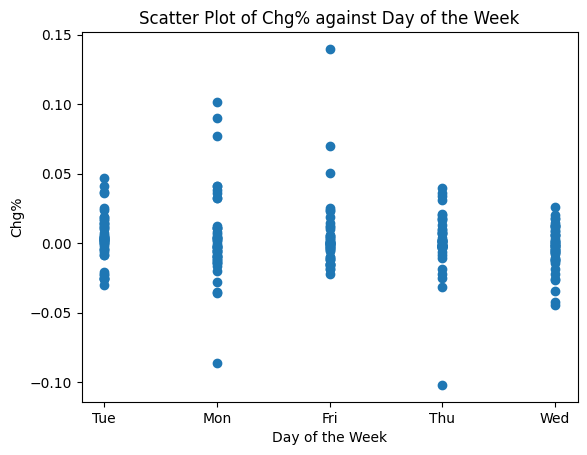

In [15]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

file_path = r"C:\Users\YSPRE\Downloads\Lab Session1 Data.xlsx"
df_stock = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# To calculate mean and variance of Price data
price_mean = statistics.mean(df_stock['Price'])
price_variance = statistics.variance(df_stock['Price'])

print(f"Mean Price: {price_mean}")
print(f"Variance of Price: {price_variance}")

# To Calculate sample mean of prices for all Wednesdays
wednesday_prices = df_stock[df_stock['Day'] == 'Wed']['Price']
wednesday_mean = statistics.mean(wednesday_prices)

print(f"Sample Mean of Wednesday Prices: {wednesday_mean}")

# To Calculate sample mean of prices for the month of April
april_prices = df_stock[df_stock['Month'] == 'Apr']['Price']
april_mean = statistics.mean(april_prices)

print(f"Sample Mean of April Prices: {april_mean}")

# To Calculate the probability of making a loss over the stock
loss_probability = len(df_stock[df_stock['Chg%'] < 0]) / len(df_stock)
print(f"Probability of making a loss: {loss_probability}")

# To Calculate the probability of making a profit on Wednesday
wednesday_profit_probability = len(wednesday_prices[wednesday_prices.diff() > 0]) / len(wednesday_prices)
print(f"Probability of making a profit on Wednesday: {wednesday_profit_probability}")

# To Calculate the conditional probability of making a profit given today is Wednesday
conditional_profit_given_wednesday = wednesday_profit_probability / len(df_stock[df_stock['Day'] == 'Wed'])
print(f"Conditional Probability of making profit given today is Wednesday: {conditional_profit_given_wednesday}")

# Scatter plot of Chg% data against the day of the week
plt.scatter(df_stock['Day'], df_stock['Chg%'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% against Day of the Week')
plt.show()
